In [80]:
from importlib import reload

import myutman
reload(myutman.stand_utils)
reload(myutman.stand)
reload(myutman.window_algo)
reload(myutman.generation)

from myutman.fuse import FuseForWindowAlgo
from myutman.generation import ClientTerminalsReorderSampleGeneration, ChangeWithClientSampleGeneration, \
    ChangeWithTerminalSampleGeneration, ChangeSampleGeneration, StillSampleGeneration, \
    SimpleMultichangeSampleGeneration
from myutman.node_distribution import RoundrobinNodeDistribution, DependentNodeDistribution, \
    SecondMetaDependentNodeDistribution
from myutman.stand import Stand
from myutman.stand_utils import compare_vals, show_boxplots
from myutman.window_algo import WindowStreamingAlgo

import json

In [49]:
n_nodes = 5
stand_centralized = Stand(
    n_nodes=1,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_roundrobins = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_client_dependent = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=SecondMetaDependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_terminal_dependent = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=SecondMetaDependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)
"""stand_resharding = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)"""

'stand_resharding = Stand(\n    n_nodes=n_nodes,\n    algo=WindowStreamingAlgo,\n    client_node_distribution=DependentNodeDistribution,\n    terminal_node_distribution=DependentNodeDistribution,\n    fuse=FuseForWindowAlgo()\n)'

In [50]:
print(stand_centralized.result_filename)

outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=1


In [ ]:
stands = [
    stand_centralized,
    stand_roundrobins,
    stand_client_dependent,
    stand_terminal_dependent
]

generations = [
    ChangeSampleGeneration
]

n_clients = 5
n_terminals = 5

results = [[[] for _ in stands] for _ in generations]
for state in range(10):
    for i, generation in enumerate(generations):
        sample, change_points, change_points_ids = generation(state=state)(
            size=10000, 
            n_clients=n_clients,
            n_terminals=n_terminals,
            change_period=0,
            change_period_noise=0,
            change_interval=200
        )
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                change_ids=change_points_ids,
                n_clients=n_clients,
                n_terminals=n_terminals
            )
            print(result1)
            results[i][j].append(result1)


{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': None, 'client_False': 0, 'terminal_False': 0, 'client_latency': 298.0, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': 1.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': None, 'client_False': 1, 'terminal_False': 0, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': None, 'client_False': 0, 'terminal_False': 0, 'client_latency': 28.0, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': None, 'client_False': 0, 'terminal_False': 0, 'client_latency': 28.0, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': 130.0, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': None, 'client_False': 0, 'terminal_False': 0, 'client_latency': 238.0, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': None, 'client_False': 0, 'terminal_False': 0, 'client_latency': 47.0, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}



{'client_TDR': 0.0, 'client_MDR': 1.0, 'client_FDR': None, 'terminal_TDR': None, 'terminal_MDR': None, 'terminal_FDR': 1.0, 'client_False': 0, 'terminal_False': 1, 'client_latency': None, 'terminal_latency': None}


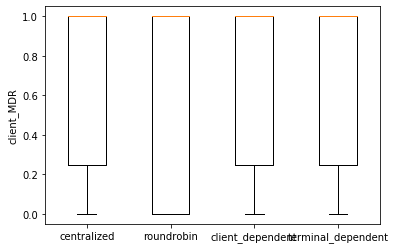

In [83]:
show_boxplots('client_MDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

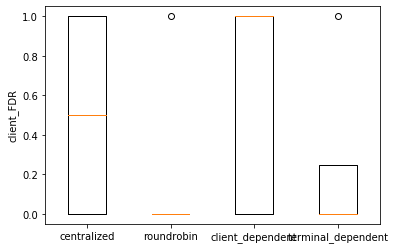

In [84]:
show_boxplots('client_FDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

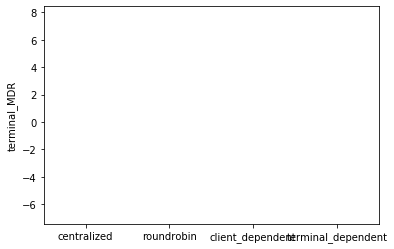

In [85]:
show_boxplots('terminal_MDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

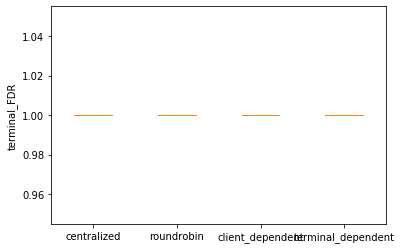

In [86]:
show_boxplots('terminal_FDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

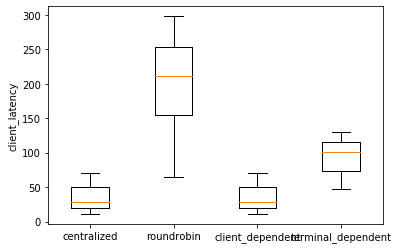

In [87]:
show_boxplots('client_latency', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

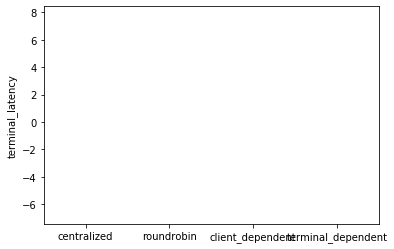

In [88]:
show_boxplots('terminal_latency', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [76]:
stands = [
    stand_centralized,
    stand_roundrobins,
    stand_client_dependent,
]

generations = [
    SimpleMultichangeSampleGeneration
]

n_clients = 1
n_terminals = 1

results = [[[] for _ in stands] for _ in generations]
for state in range(10):
    for i, generation in enumerate(generations):
        sample, change_points, change_points_ids = generation(state=state)(
            size=10000,
            tau=200
        )
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                change_ids=change_points_ids,
                n_clients=n_clients,
                n_terminals=n_terminals
            )
            print(result1)
            results[i][j].append(result1)


{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.68, 'terminal_latency': 6.68}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 20.28, 'terminal_latency': 20.28}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.68, 'terminal_latency': 6.68}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.74, 'terminal_latency': 6.74}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 34.204081632653065, 'terminal_latency': 34.204081632653065}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.74, 'terminal_latency': 6.74}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.76, 'terminal_latency': 6.76}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 20.306122448979593, 'terminal_latency': 20.306122448979593}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.76, 'terminal_latency': 6.76}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.78, 'terminal_latency': 6.78}



{'client_TDR': 0.96, 'client_MDR': 0.040000000000000036, 'client_FDR': 0.0, 'terminal_TDR': 0.96, 'terminal_MDR': 0.040000000000000036, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 28.229166666666668, 'terminal_latency': 28.229166666666668}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.78, 'terminal_latency': 6.78}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.7, 'terminal_latency': 6.7}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 20.510204081632654, 'terminal_latency': 20.510204081632654}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.7, 'terminal_latency': 6.7}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.94, 'terminal_latency': 6.94}



{'client_TDR': 0.96, 'client_MDR': 0.040000000000000036, 'client_FDR': 0.0, 'terminal_TDR': 0.96, 'terminal_MDR': 0.040000000000000036, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 24.083333333333332, 'terminal_latency': 24.083333333333332}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.94, 'terminal_latency': 6.94}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.78, 'terminal_latency': 6.78}



{'client_TDR': 0.94, 'client_MDR': 0.06000000000000005, 'client_FDR': 0.0, 'terminal_TDR': 0.94, 'terminal_MDR': 0.06000000000000005, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 24.127659574468087, 'terminal_latency': 24.127659574468087}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.78, 'terminal_latency': 6.78}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.96, 'terminal_latency': 6.96}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 19.62, 'terminal_latency': 19.62}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.96, 'terminal_latency': 6.96}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.836734693877551, 'terminal_latency': 6.836734693877551}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 29.714285714285715, 'terminal_latency': 29.714285714285715}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.836734693877551, 'terminal_latency': 6.836734693877551}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.32, 'terminal_latency': 6.32}



{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.0, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 25.3265306122449, 'terminal_latency': 25.3265306122449}



{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.0, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.0, 'client_False': 0, 'terminal_False': 0, 'client_latency': 6.32, 'terminal_latency': 6.32}


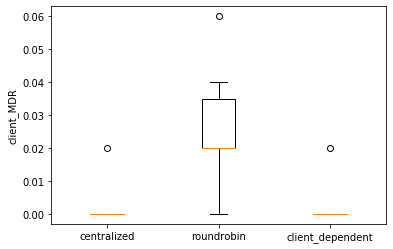

In [77]:
show_boxplots('client_MDR', results[0], ['centralized', 'roundrobin', 'client_dependent'])

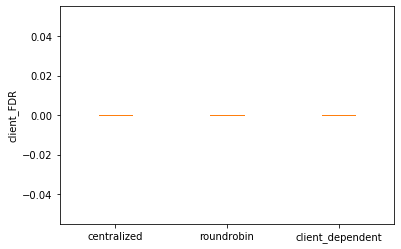

In [78]:
show_boxplots('client_FDR', results[0], ['centralized', 'roundrobin', 'client_dependent'])

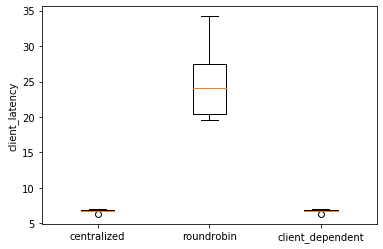

In [79]:
show_boxplots('client_latency', results[0], ['centralized', 'roundrobin', 'client_dependent'])

In [81]:
with open('simple_results.json', 'w') as simple_file:
    json.dump(results, simple_file, indent=4, ensure_ascii=False)